<a href="https://colab.research.google.com/github/daoudecho/Enter-to-TensorFlow/blob/master/fruits360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle  # installing kaggel

In [0]:

# upload "keggle.json" file that we download from keggle creat your API 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [0]:

!kaggle datasets download -d moltean/fruits -w -f fruits.zip

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls 


fruits-360  fruits.zip	readme.md  sample_data


In [0]:
# Unzip the data
!unzip fruits.zip


Archive:  fruits.zip
replace fruits-360/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!ls /content/fruits-360/

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [0]:
!mkdir -p /content/fruits-360/Training/test/test-multiple_fruits

In [0]:
# Path to data
data_dir  = '/content/fruits-360/'
train_dir = data_dir+'Training/'
test_dir  = data_dir+'Test/'
val_dir   = data_dir + 'test-multiple_fruits/'


In [0]:
!ls

fruits-360  fruits.zip	readme.md  sample_data


In [0]:
import os
import shutil
#os.removedirs('/content/fruits-360/Training/test/')
shutil.rmtree('/content/fruits-360/Training/test/')
#os.rmdir('/content/fruits-360/Training/test/')
#os.remove("/content/fruits-360/Training/test/")
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))
print(len(os.listdir(val_dir)))
print(len(os.listdir(data_dir)))

120
120
106
6


In [0]:
!ls /content/fruits-360/Training/test

test-multiple_fruits


In [0]:
train_dir = os.listdir(train_dir)
print(train_dir[:])
test_dir = os.listdir(test_dir)
print(test_dir[:])

['Granadilla', 'Cherry Wax Black', 'Tomato Cherry Red', 'Mulberry', 'Eggplant', 'Tomato 3', 'Banana Lady Finger', 'Ginger Root', 'Pear', 'Papaya', 'Apple Granny Smith', 'Salak', 'Pineapple Mini', 'Pepino', 'Cantaloupe 1', 'Potato Red', 'Apple Golden 3', 'Pear Forelle', 'Avocado ripe', 'Apple Crimson Snow', 'Plum', 'Lychee', 'Tomato Maroon', 'Potato White', 'Hazelnut', 'Apple Red Delicious', 'Beetroot', 'Plum 3', 'Pepper Green', 'Kaki', 'Nectarine Flat', 'Dates', 'Physalis', 'Nectarine', 'Pomegranate', 'Huckleberry', 'Banana Red', 'Grapefruit White', 'Quince', 'Onion Red', 'Apple Red 1', 'Blueberry', 'Mango', 'Maracuja', 'Grape White 3', 'Pepper Yellow', 'Apple Golden 1', 'Kohlrabi', 'Grape Pink', 'Peach Flat', 'Peach 2', 'Apple Pink Lady', 'Onion Red Peeled', 'Clementine', 'Apple Red Yellow 2', 'Pitahaya Red', 'Chestnut', 'Apricot', 'Strawberry', 'Mangostan', 'Avocado', 'Tomato 1', 'Cherry Wax Yellow', 'Rambutan', 'Melon Piel de Sapo', 'Plum 2', 'Tomato 4', 'Potato Sweet', 'Apple Red 2

In [0]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os

In [0]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("/content/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45,45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

id_to_label_dict

#print(fruit_images.shape)
#imgplot = plt.imshow(fruit_images[1])
#print(imgplot)

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Dates',
 36: 'Eggplant',
 37: 'Ginger Root',
 38: 'Granadilla',
 39: 'Grape Blue',
 40: 'Grape Pink',
 41: 'Grape White',
 42: 'Grape White 2',
 43: 'Grape White 3',
 44: 'Grape White 4',
 45: 'Grapefruit Pink',
 46: 'Grapefruit White',
 47: 'Guava',
 48: 'Haze

In [0]:

fruit_images_test = []
labels_test = [] 
for fruit_dir_path in glob.glob("/content/fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45,45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images_test.append(image)
        labels_test.append(fruit_label)
fruit_images_test = np.array(fruit_images_test)
labels_test = np.array(labels_test)

label_to_id_test_dict = {v:i for i,v in enumerate(np.unique(labels_test))}
id_to_label_test_dict = {v: k for k, v in label_to_id_dict.items()}

id_to_label_test_dict

#print(fruit_images_test.shape)
#imgplot = plt.imshow(fruit_images_test[1])
#print(imgplot)


{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Dates',
 36: 'Eggplant',
 37: 'Ginger Root',
 38: 'Granadilla',
 39: 'Grape Blue',
 40: 'Grape Pink',
 41: 'Grape White',
 42: 'Grape White 2',
 43: 'Grape White 3',
 44: 'Grape White 4',
 45: 'Grapefruit Pink',
 46: 'Grapefruit White',
 47: 'Guava',
 48: 'Haze

In [0]:

fruit_images_val = []
labels_val = [] 
for fruit_dir_path in glob.glob("/content/fruits-360/test-multiple_fruits/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (100,100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images_test.append(image)
        labels_test.append(fruit_label)
fruit_images_val = np.array(fruit_images_val)
labels_val = np.array(labels_val)

label_to_id_val_dict = {v:i for i,v in enumerate(np.unique(labels_val))}
id_to_label_val_dict = {v: k for k, v in label_to_id_dict.items()}

id_to_label_val_dict

#print(fruit_images_val.shape)
#imgplot = plt.imshow(fruit_images_val[1])
#print(imgplot)


{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Dates',
 36: 'Eggplant',
 37: 'Ginger Root',
 38: 'Granadilla',
 39: 'Grape Blue',
 40: 'Grape Pink',
 41: 'Grape White',
 42: 'Grape White 2',
 43: 'Grape White 3',
 44: 'Grape White 4',
 45: 'Grapefruit Pink',
 46: 'Grapefruit White',
 47: 'Guava',
 48: 'Haze

In [0]:
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

## Specify the values for all arguments to data_generator_with_augmant.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                            
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )

In [0]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100 , 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax') # 'sigmoid' for binary classifcation
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)             

In [0]:
training_datagen = ImageDataGenerator( #augmentation 
      rescale = 1./255,
	    rotation_range=40, # 40 degree
      width_shift_range=0.2, # left and right by 20%
      height_shift_range=0.2, # up and down by 20%
      shear_range=0.2, # Shear angle by 20%
      zoom_range=0.2,  #zoom by 20%
      horizontal_flip=True, # horizontil image 
      fill_mode='nearest')


trainign_dir="/content/fruits-360/Training/"
train_generator = training_datagen.flow_from_directory(
	trainign_dir,
	target_size=(100,100),
	class_mode='categorical'
)
'''
val_dir="/content/fruits-360/test-multiple_fruits/"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(100,100),
	class_mode='categorical'
)'''

test_dir="/content/fruits-360/Test/"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(100,100),
	class_mode='categorical'
)

history = model.fit_generator(train_generator, epochs=25, validation_data = test_generator , verbose = 1)

model.save("fruits360.h5")

Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.
Epoch 1/25
1891/1891 [==============================] - 761s 402ms/step - loss: 1.1044 - acc: 0.6690 - val_loss: 0.2349 - val_acc: 0.9208
Epoch 2/25
1891/1891 [==============================] - 760s 402ms/step - loss: 0.2797 - acc: 0.9068 - val_loss: 0.1572 - val_acc: 0.9576
Epoch 3/25
1891/1891 [==============================] - 757s 400ms/step - loss: 0.1917 - acc: 0.9404 - val_loss: 0.1287 - val_acc: 0.9714
Epoch 4/25
1891/1891 [==============================] - 758s 401ms/step - loss: 0.1564 - acc: 0.9528 - val_loss: 0.1430 - val_acc: 0.9687
Epoch 5/25
1891/1891 [==============================] - 756s 400ms/step - loss: 0.1456 - acc: 0.9602 - val_loss: 0.2112 - val_acc: 0.9697
Epoch 6/25
1891/1891 [==============================] - 754s 399ms/step - loss: 0.1317 - acc: 0.9645 - val_loss: 0.1629 - val_acc: 0.9692
Epoch 7/25
1891/1891 [==============================] - 757s 400ms/step - loss: 0.

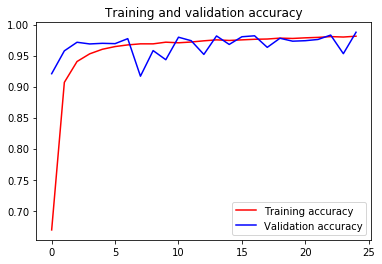

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving kiwi.jpg to kiwi (1).jpg
kiwi.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
